In [37]:
# Install dependencies as needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "steam_games.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "srgiomanhes/steam-games-dataset-2025",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\marys\AppData\Local\Temp\ipykernel_5168\2148164560.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    steam_appid                  name           developers  \
0      2719580              勇者の伝説の勇者             ['ぽけそう']   
1      2719590         Light No Fire      ['Hello Games']   
2      2719600  Lorhaven: Cursed War  ['GoldenGod Games']   
3      2719610          PUIQ: Demons          ['Giammnn']   
4      2719650        Project XSTING      ['Saucy Melon']   

            publishers                                         categories  \
0             ['ぽけそう']                ['Single-player', 'Family Sharing']   
1      ['Hello Games']  ['Single-player', 'Multi-player', 'Co-op', 'On...   
2  ['GoldenGod Games']  ['Single-player', 'Multi-player', 'PvP', 'Shar...   
3          ['Giammnn']  ['Single-player', 'Steam Achievements', 'Famil...   
4      ['Saucy Melon']  ['Single-player', 'Steam Achievements', 'Steam...   

                                          genres  required_age  \
0                            ['Casual', 'Indie']             0   
1                    

In [38]:
print("Liczba obserwacji:", len(df))
print("Liczba zmiennych:", df.shape[1])
print("Liczba braków danych:", df.isnull().sum().sum())
print("Typy zmiennych:\n", df.dtypes)

Liczba obserwacji: 71429
Liczba zmiennych: 21
Liczba braków danych: 0
Typy zmiennych:
 steam_appid              int64
name                    object
developers              object
publishers              object
categories              object
genres                  object
required_age             int64
n_achievements           int64
platforms               object
is_released               bool
release_date            object
additional_content      object
total_reviews            int64
total_positive           int64
total_negative           int64
review_score           float64
review_score_desc       object
positive_percentual    float64
metacritic               int64
is_free                   bool
price_initial (USD)    float64
dtype: object


statystyki opisowe dla zmiennych numerycznych:

In [39]:
print(df.describe())

        steam_appid  required_age  n_achievements  total_reviews  \
count  7.142900e+04  71429.000000    71429.000000   7.142900e+04   
mean   1.613700e+06      2.573227       16.079478   4.102497e+02   
std    8.625559e+05     13.591997      138.084319   8.389934e+03   
min    7.300000e+02      0.000000        0.000000   0.000000e+00   
25%    9.296400e+05      0.000000        0.000000   0.000000e+00   
50%    1.533470e+06      0.000000        0.000000   2.000000e+00   
75%    2.383530e+06      0.000000       16.000000   1.900000e+01   
max    3.430140e+06     97.000000     9821.000000   1.279700e+06   

       total_positive  total_negative  review_score  positive_percentual  \
count    7.142900e+04    71429.000000  71429.000000         71429.000000   
mean     3.602238e+02       50.025886      2.192849            46.113290   
std      7.409672e+03     1171.055349      3.175885            41.961702   
min      0.000000e+00        0.000000      0.000000             0.000000   
25%    

In [40]:
group_column = 'platforms' if 'platforms' in df.columns else df.select_dtypes(include='object').columns[0]
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"\nŚrednie zmienne numeryczne względem: {group_column}")
print(df.groupby(group_column)[numeric_columns].mean())


Średnie zmienne numeryczne względem: platforms
                              steam_appid  required_age  n_achievements  \
platforms                                                                 
['linux']                    1.548167e+06      0.000000        0.000000   
['mac', 'linux']             5.945500e+05      0.000000        0.000000   
['mac']                      1.424258e+06      0.000000        4.142857   
['windows', 'linux']         1.737716e+06      1.875910       14.910762   
['windows', 'mac', 'linux']  1.257880e+06      6.527982       23.946482   
['windows', 'mac']           1.418302e+06      4.332467       14.906102   
['windows']                  1.678901e+06      1.867697       15.226311   

                             total_reviews  total_positive  total_negative  \
platforms                                                                    
['linux']                         8.500000        3.333333        5.166667   
['mac', 'linux']                 63.000000

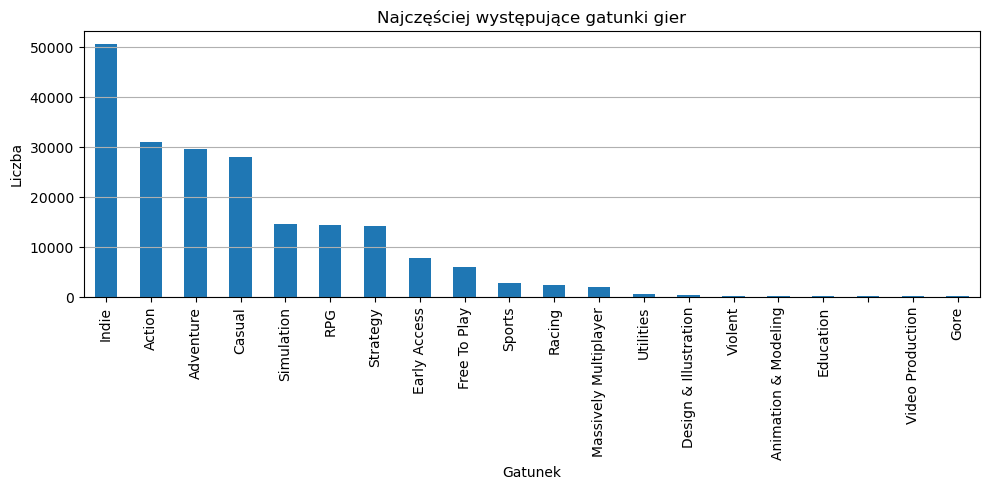

In [41]:
multilabel_column = 'genres' if 'genres' in df.columns else df.columns[df.columns.str.contains('genre|tag', case=False)][0]
genres_split = df[multilabel_column].dropna().str.replace(r'[\[\]\']', '', regex=True).str.split(', ').explode()
genre_counts = genres_split.value_counts()

plt.figure(figsize=(10, 5))
genre_counts.head(20).plot(kind='bar')
plt.title('Najczęściej występujące gatunki gier')
plt.xlabel('Gatunek')
plt.ylabel('Liczba')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

jak widac, najczesciej wystepuja gatunki: Indie, action, adventure, casual. wiele jest tez takich, ktore wystepuja bardzo rzadko

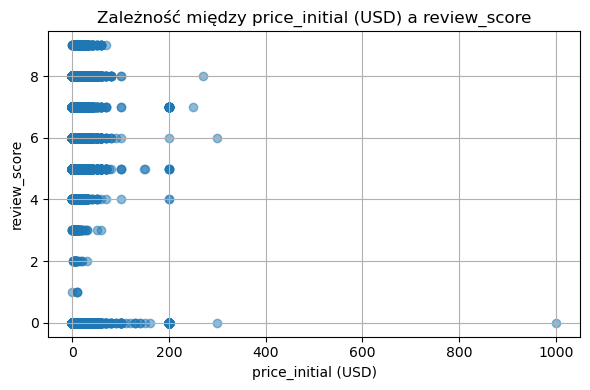

In [42]:
x_col = 'price_initial (USD)' if 'price_initial (USD)' in df.columns else df.select_dtypes(include=[np.number]).columns[0]
y_col = 'review_score' if 'review_score' in df.columns else df.select_dtypes(include=[np.number]).columns[1]

plt.figure(figsize=(6, 4))
plt.scatter(df[x_col], df[y_col], alpha=0.5)
plt.title(f'Zależność między {x_col} a {y_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.grid(True)
plt.tight_layout()
plt.show()


najwiecej opinii jest dla gier o najnizszych cenach, dla tych najdrozszych mamy bardzo malo informacji o ocenie.

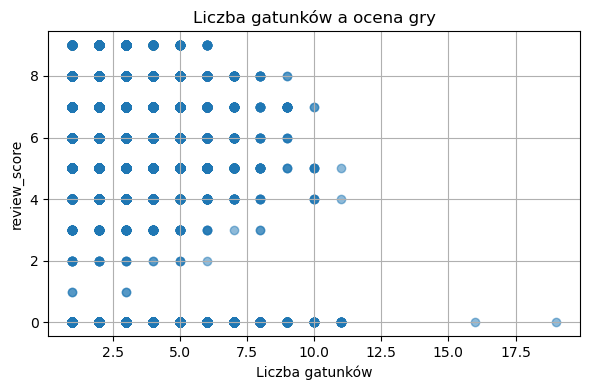

In [43]:
df['genre_count'] = df[multilabel_column].dropna().str.replace(r'[\[\]\']', '', regex=True).str.count(',') + 1

plt.figure(figsize=(6, 4))
plt.scatter(df['genre_count'], df[y_col], alpha=0.5)
plt.title('Liczba gatunków a ocena gry')
plt.xlabel('Liczba gatunków')
plt.ylabel(y_col)
plt.grid(True)
plt.tight_layout()
plt.show()

malo jest gatunkow o bardzo dobrej ocenie, wiekszosc ma przecietna